## Extract MINST data

In [1]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np
from numpy import linalg as LA
import copy
import itertools

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

2023-06-01 10:05:23.926388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-01 10:05:23.926414: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-01 10:05:28.865293: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-01 10:05:28.865317: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (marco-Lenovo-S340-15IWL): /proc/driver/nvidia/version does not exist
2023-06-01 10:05:28.865752: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operatio

In [2]:
def angle_encoding(qubits, data_row):
    circuit = cirq.Circuit()
    values = data_row*2*np.pi - np.pi
    for i, qubit in enumerate(qubits):
        circuit += (cirq.ry(values[i]).on(qubit))
    return circuit

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))


Number of original training examples: 60000
Number of original test examples: 10000


In [4]:
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x,y

Number of filtered training examples: 12049
Number of filtered test examples: 1968
True
True


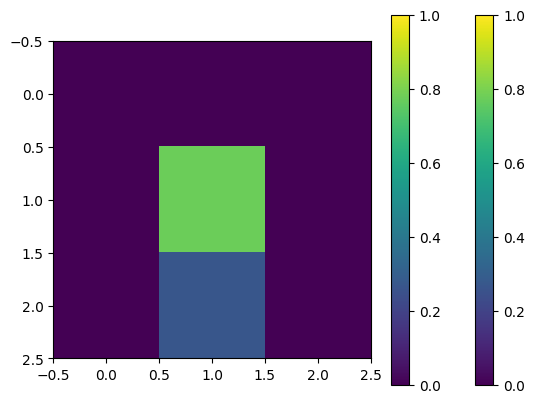

In [5]:
x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

print(y_train[0])

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()

x_train_small = tf.image.resize(x_train, (3,3)).numpy()
x_test_small = tf.image.resize(x_test, (3,3)).numpy()

print(y_train[10])

plt.imshow(x_train_small[10,:,:,0], vmin=0, vmax=1)
plt.colorbar()


In [6]:
#x_train_small = x_train_small[0:800]
#x_test_small = x_test_small[0:100]

#We want output of 1 of -1
y_train = 2.0*y_train - 1.0
y_test = 2.0*y_test - 1.0

#y_train = y_train[0:800]
#y_test = y_test[0:100]

qubits = cirq.GridQubit.rect(1, 9) #grid of qubit


quantum_states_train = [np.ravel(x_train_small[i]) for i in range(len(x_train_small))]
quantum_states_test = [np.ravel(x_test_small[i]) for i in range(len(x_test_small))]

train_circuits_data = [angle_encoding(qubits, quantum_states_train[i]) for i in range(len(quantum_states_train))] 
test_circuits_data = [angle_encoding(qubits, quantum_states_test[i]) for i in range(len(quantum_states_test))] 




In [7]:
import json

json_circuits = [cirq.to_json(train_circuits_data[i]) for i in range(len(train_circuits_data))]

# Open a file in write mode
with open('angle_encoding_train.json', 'w') as f:
    # Use json.dump() to write the list of JSON strings to the file
    json.dump(json_circuits, f)

# Close the file
f.close()

json_circuits = [cirq.to_json(test_circuits_data[i]) for i in range(len(test_circuits_data))]

# Open a file in write mode
with open('angle_encoding_test.json', 'w') as f:
    # Use json.dump() to write the list of JSON strings to the file
    json.dump(json_circuits, f)

# Close the file
f.close()

np.savetxt("y_train.txt", y_train)
np.savetxt("y_test.txt", y_test)